In [12]:
import pandas as pd
from scipy.stats import trim_mean
import numpy as np
import wquantiles as wq
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [13]:
state = pd.read_csv('state.csv')

In [14]:
pd.read_csv('state.csv')

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [15]:
state.head(10)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [16]:
state['Population'].mean()

6162876.3

In [17]:
trim_mean(state['Population'], 0.1)

4783697.125

In [18]:
np.average(state['Murder.Rate'], weights = state['Population'])

4.445833981123393

In [19]:
wq.median(state['Murder.Rate'], weights = state['Population'])

4.4

In [20]:
state['Population'].std()

6848235.347401142

In [21]:
state['Population'].quantile(0.75)-state['Population'].quantile(0.25)

4847308.0

In [22]:
sm.robust.scale.mad(state['Population'])

3849876.1459979336

In [23]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [24]:
state['Murder.Rate'].median()

4.0

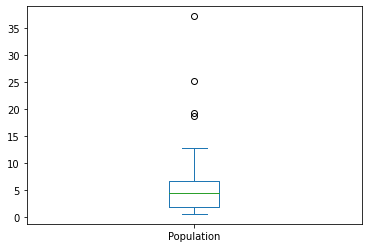

In [25]:
ax = (state['Population']/1_000_000).plot.box()
#ax.set_ylabel('Population (millions)')

In [26]:
(state['Population']/1_000_000).max() - (state['Population']/1_000_000).min()

36.69033

In [27]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Murder.Rate')

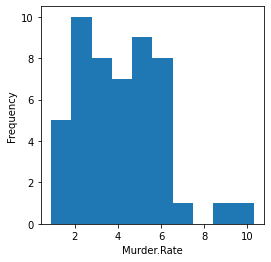

In [28]:
ax = (state['Murder.Rate']).plot.hist(figsize=(4,4))
ax.set_xlabel('Murder.Rate')

Text(0.5, 0, 'Murder Rate (per 100,000)')

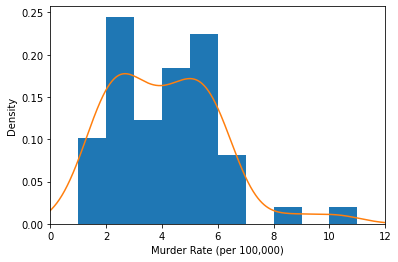

In [29]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim = [0,12], bins = range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [32]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

In [33]:
mean

array(0.)

Text(0.5, 0, 'Murder Rate (per 100,000)')

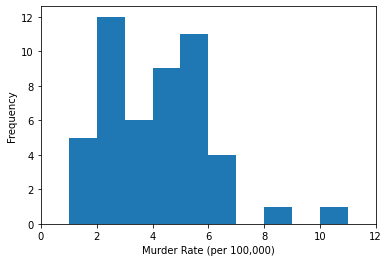

In [34]:
ax = state['Murder.Rate'].plot.hist(density=False, xlim = [0,12], bins = range(1,12))
#state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [35]:
dfw = pd.read_csv('dfw_airline.csv')

In [36]:
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

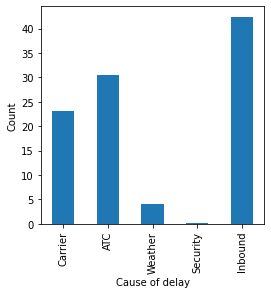

In [37]:
ax = (dfw.transpose()/279126*100).plot.bar(figsize = (4,4), legend = False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [38]:
print(dfw.sum())

Carrier      64263.16
ATC          84856.50
Weather      11235.42
Security       343.15
Inbound     118427.82
dtype: float64


In [39]:
64263.16+84856.50+11235.42+343.15+118427.82

279126.05000000005

In [40]:
dfw.transpose()/279126*100

,0
Carrier,23.022993
ATC,30.400787
Weather,4.025214
Security,0.122937
Inbound,42.428086


In [41]:
kc_tax

NameError: name 'kc_tax' is not defined

### Exploring Two or More Variables

***Hexagonal Binning and Contours
(Plotting Numeric Versus Numeric Data)***

In [3]:
kc_tax = pd.read_csv(r'data/kc_tax.csv')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

In [3]:
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


Text(0, 0.5, 'Tax-Assessed Value')

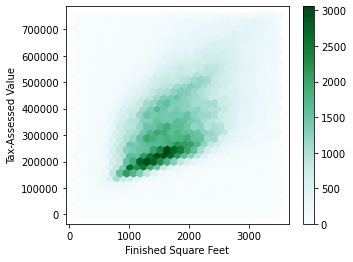

In [4]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [ ]:
bx = sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, bx=ax)
bx.set_xlabel('Finished Square Feet')
bx.set_ylabel('Tax-Assessed Value')

In [7]:
type(kc_tax0.SqFtTotLiving)

pandas.core.series.Series

**Two Categorical Variables**

In [11]:
lc_loans = pd.read_csv('lc_loans.csv')
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)
df = crosstab.loc['A':'G',:].copy()
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df

In [13]:
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [15]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [16]:
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D
